In [1]:
%load_ext autoreload
%autoreload 2

## Results on MNISTs

### Prepation: Run experiments on Lisa GPUs before visualizing results

> **Note**: It might take a long time to run this on a CPU machine (~40 mins). Instead, we would recommend
> running it on a Lisa GPU machine using the following instructions. That will run and generate all results
> and then you could run the cell below which will display all the results.

**Instruction to run it on a Lisa GPU**
1. Create a job script as follows and save it as `lisa_mnist.job`:

```sh
#!/bin/bash

#SBATCH --partition=gpu_shared_course
#SBATCH --gres=gpu:1
#SBATCH --job-name=MNIST
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=2
#SBATCH --time=10:00:00
#SBATCH --mem=32000M
#SBATCH --output=slurm_output_%A.out

module purge
module load 2021
module load Anaconda3/2021.05

# Activate your environment
source deactivate
source activate gcn-gpu

# Run your code
## runs all experiments to reproduce Table 2 in the paper
python mnist_pipeline.py
## runs all additional analyses around explainability
python mnist_analysis.py
```

2. Run the job script using 

```sh
cd /path/to/repo/experiments/
sbatch lisa_mnist.job
```

3. After these steps are done, you can run the following cells that will display the result.

### Replication of Table 2

In [2]:
from mnist_pipeline import run_experiments

In [3]:
df = run_experiments(seed=0, show=False)

::::: Experimental setup :::::
Train generative model: False
Generate data: True
Args: {'seed': 0, 'dataset': 'colored_MNIST'}
Train Dataset already generated at /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/data/colored_MNIST_train.pth.
Test Dataset already generated at /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/data/colored_MNIST_test.pth.
Results for classifier already exist: mnists/experiments/classifier_colored_MNIST_seed_0/test_accs.pth
::::: Experimental setup :::::
Train generative model: False
Generate data: True
Args: {'seed': 0, 'dataset': 'colored_MNIST', 'weight_path': '/home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/gan_colored_MNIST/weights/ckp.pth'}
Dataset already generated at /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/data/colored_MNIST_gan.pth.
Results for classifier already exist: mnists/experiments/classifier_colored_MNIST_gan_seed_0/test_accs.pth
::::: Experimental setup :::::
Trai

In [14]:
df.index = ["Original", "GAN", "CGN", "Original + GAN", "Original + CGN"]

In [15]:
# show the results    
df.astype(float).round(1)

,colored_MNIST-train,colored_MNIST-test,double_colored_MNIST-train,double_colored_MNIST-test,wildlife_MNIST-train,wildlife_MNIST-test
Original,99.7,38.1,100.0,10.4,100.0,10.7
GAN,99.6,31.3,100.0,10.1,100.0,11.0
CGN,99.4,93.1,94.8,86.6,95.0,81.1
Original + GAN,99.6,39.5,100.0,10.5,100.0,10.9
Original + CGN,99.3,95.5,96.9,85.2,97.1,65.6


### Additional experiments: Explainability analyses

In [16]:
from mnist_analysis import run_analyses

:::::> Running analysis on colored_MNIST with classifier trained on original dataset
Loading saved features from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_colored_MNIST_seed_0/features/colored_MNIST_original.pth and /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_colored_MNIST_seed_0/features/colored_MNIST_counterfactual.pth
Saving plot to /home/lcur0478/piyush/projects/fact-team3/experiments/results/plots/feature_analysis_CNN_classifier_trained_on_original_colored_MNIST.pdf


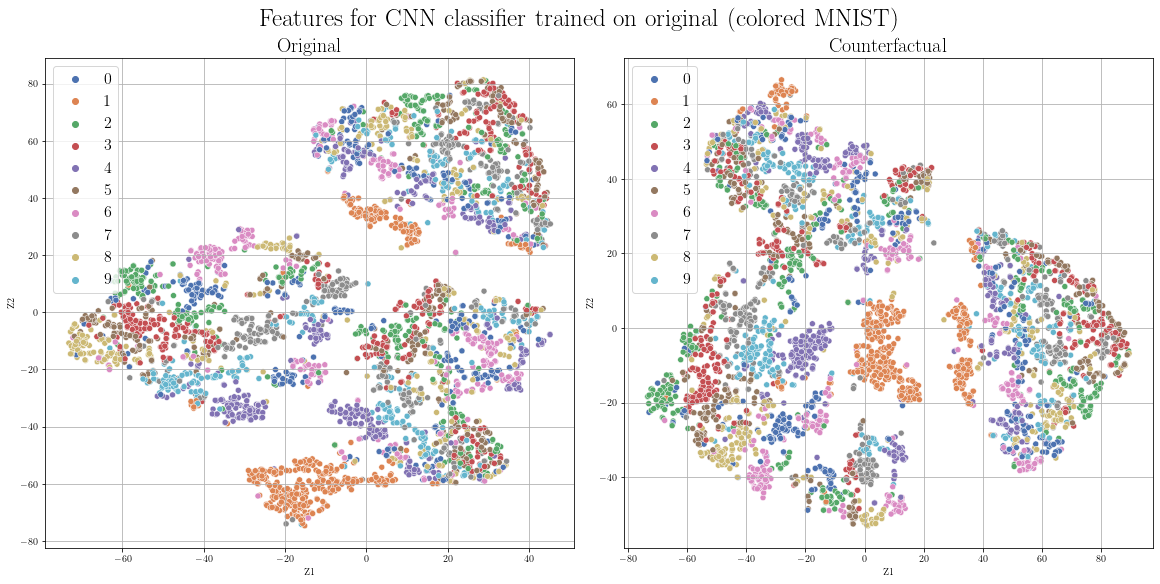

Loading saved gradcam results from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_colored_MNIST_seed_0/gradcam/colored_MNIST_gradcam_iou_seed_0.pth
Class-wise IOU:
{
    "0": 0.4366276909502185,
    "1": 0.4315859135552125,
    "2": 0.43815768882632256,
    "3": 0.43211832285517515,
    "4": 0.4331770738977522,
    "5": 0.4300134897298877,
    "6": 0.47512322284732333,
    "7": 0.4473488888040127,
    "8": 0.4271639193230341,
    "9": 0.4429047420783369,
    "overall_mean": 0.4393306556731463,
    "overall_std": 0.06439423618325169
}
:::::> Running analysis on colored_MNIST with classifier trained on CF dataset
Loading saved features from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_colored_MNIST_counterfactual_seed_0/features/colored_MNIST_original.pth and /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_colored_MNIST_counterfactual_seed_0/features/colored_MNIST_counter

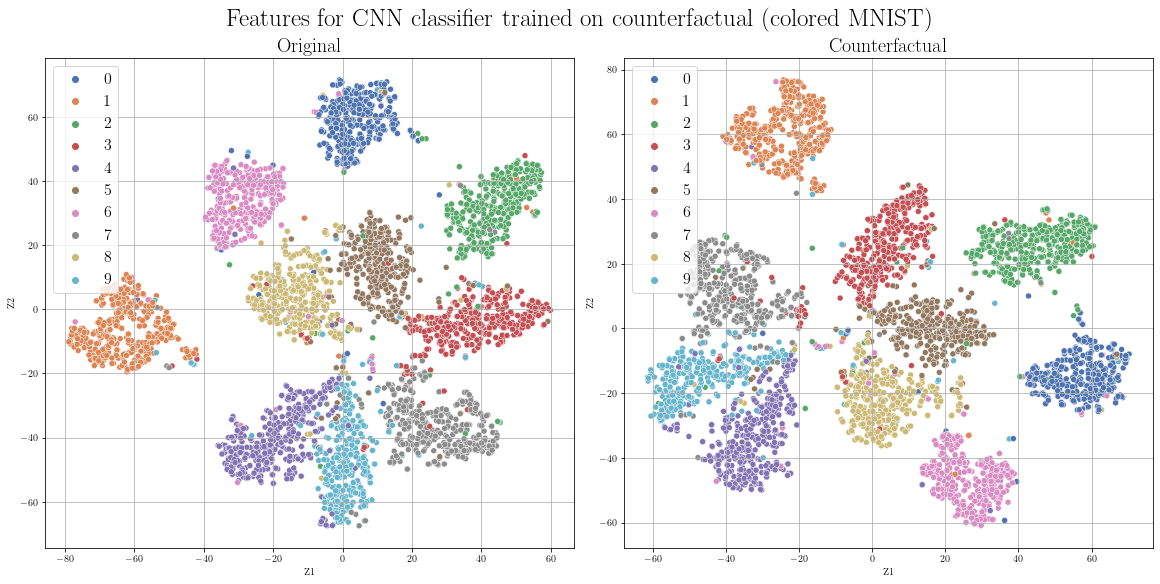

Loading saved gradcam results from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_colored_MNIST_counterfactual_seed_0/gradcam/colored_MNIST_gradcam_iou_seed_0.pth
Class-wise IOU:
{
    "0": 0.4678877196749862,
    "1": 0.45089000353203995,
    "2": 0.3971867345620033,
    "3": 0.4289563980728093,
    "4": 0.5051644745827206,
    "5": 0.44714847113519507,
    "6": 0.4544429635018546,
    "7": 0.47090653295298956,
    "8": 0.42189108866440933,
    "9": 0.4233664924609295,
    "overall_mean": 0.4465907727867365,
    "overall_std": 0.05593265729576011
}
Showing qualitative results for colored_MNIST


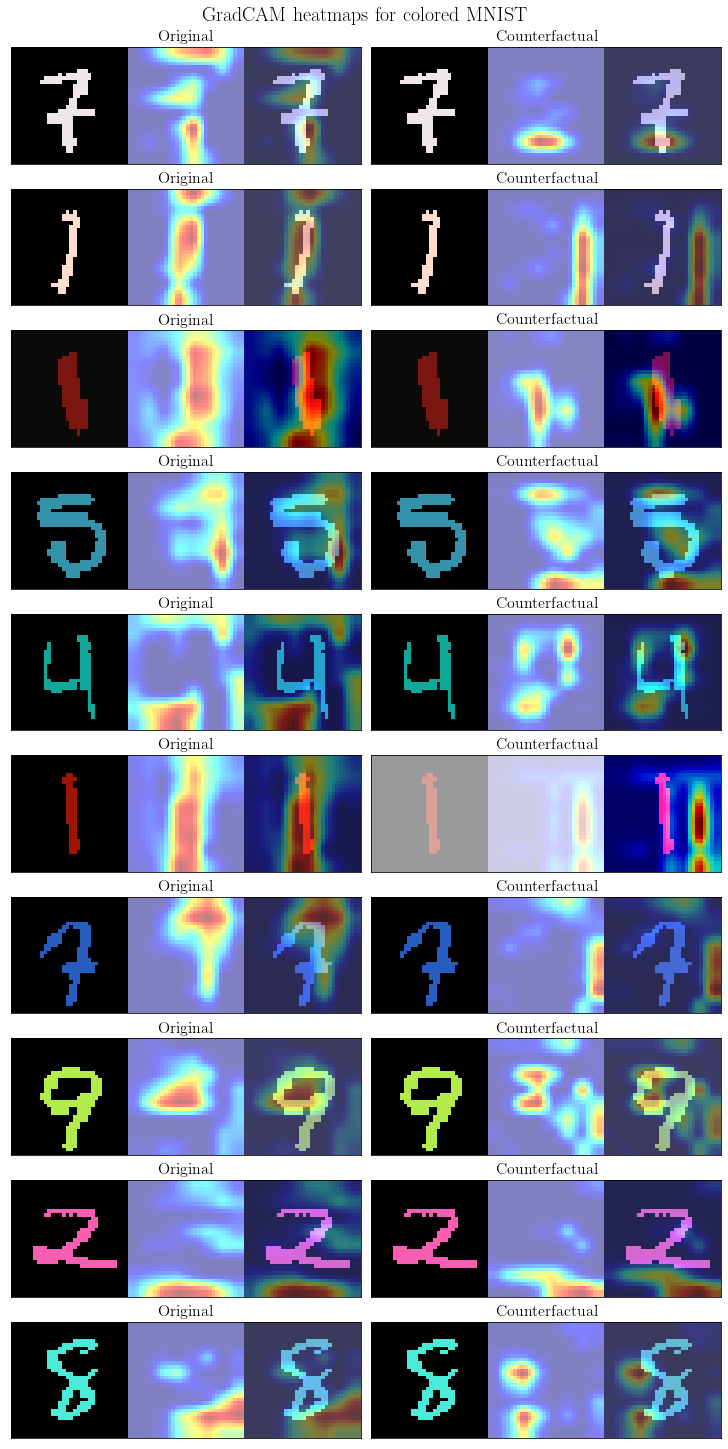

:::::> Running analysis on double_colored_MNIST with classifier trained on original dataset
Loading saved features from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_double_colored_MNIST_seed_0/features/double_colored_MNIST_original.pth and /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_double_colored_MNIST_seed_0/features/double_colored_MNIST_counterfactual.pth
Saving plot to /home/lcur0478/piyush/projects/fact-team3/experiments/results/plots/feature_analysis_CNN_classifier_trained_on_original_double_colored_MNIST.pdf


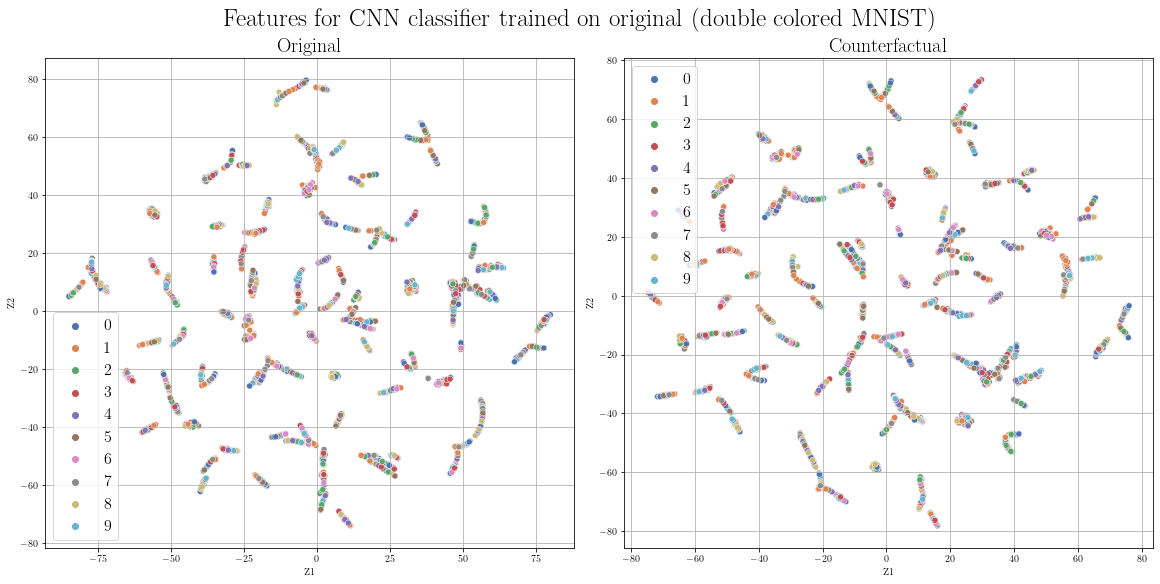

Loading saved gradcam results from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_double_colored_MNIST_seed_0/gradcam/double_colored_MNIST_gradcam_iou_seed_0.pth
Class-wise IOU:
{
    "0": 0.38674543677677903,
    "1": 0.360519292029111,
    "2": 0.3898166086712871,
    "3": 0.38827847651052244,
    "4": 0.36719018217111776,
    "5": 0.3796267184891987,
    "6": 0.37758325997281594,
    "7": 0.3663989748839938,
    "8": 0.3879415167807588,
    "9": 0.3615291212354937,
    "overall_mean": 0.37643692954033614,
    "overall_std": 0.11857969446423917
}
:::::> Running analysis on double_colored_MNIST with classifier trained on CF dataset
Loading saved features from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_double_colored_MNIST_counterfactual_seed_0/features/double_colored_MNIST_original.pth and /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_double_colored_MNIST_counterfa

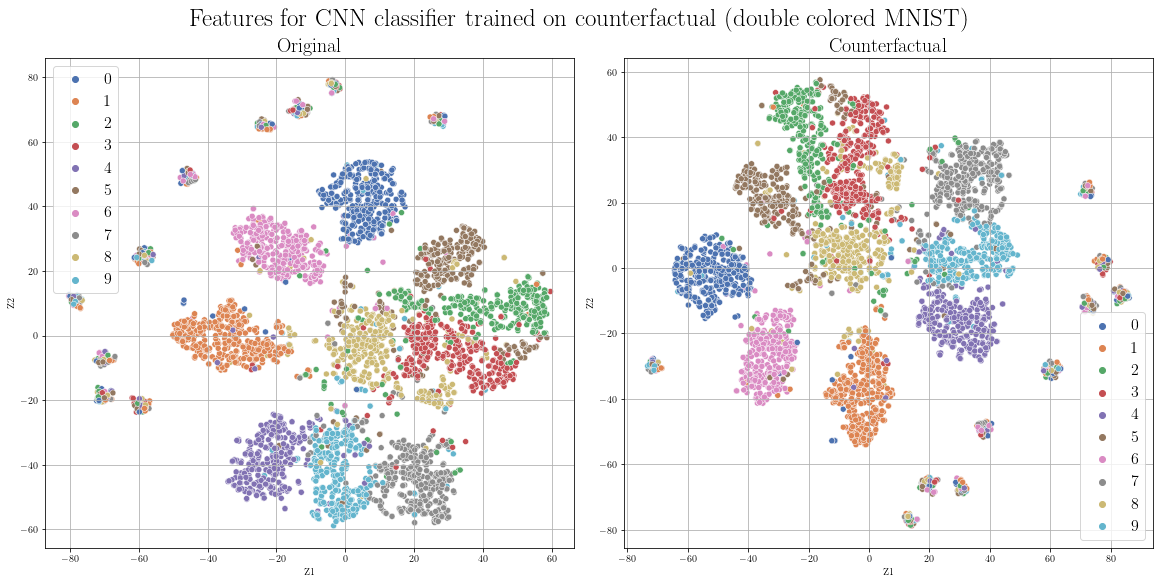

Loading saved gradcam results from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_double_colored_MNIST_counterfactual_seed_0/gradcam/double_colored_MNIST_gradcam_iou_seed_0.pth
Class-wise IOU:
{
    "0": 0.4278584595705739,
    "1": 0.4075052078841324,
    "2": 0.42339250860792216,
    "3": 0.42652224206808703,
    "4": 0.4661359378910744,
    "5": 0.42331215778335196,
    "6": 0.4140182234570307,
    "7": 0.45762205596910704,
    "8": 0.42395186834812637,
    "9": 0.44225999108214287,
    "overall_mean": 0.4313554968476295,
    "overall_std": 0.044925403167469874
}
Showing qualitative results for double_colored_MNIST


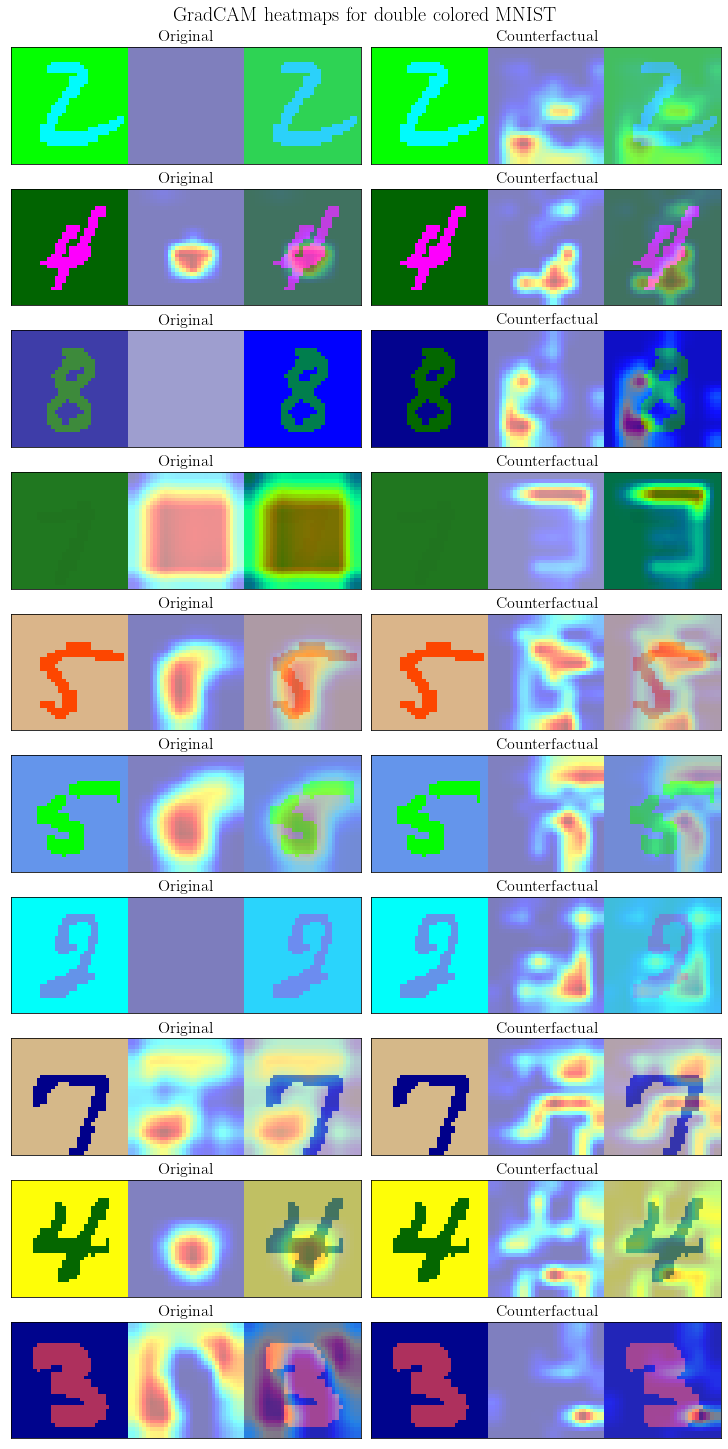

:::::> Running analysis on wildlife_MNIST with classifier trained on original dataset
Loading saved features from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_wildlife_MNIST_seed_0/features/wildlife_MNIST_original.pth and /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_wildlife_MNIST_seed_0/features/wildlife_MNIST_counterfactual.pth
Saving plot to /home/lcur0478/piyush/projects/fact-team3/experiments/results/plots/feature_analysis_CNN_classifier_trained_on_original_wildlife_MNIST.pdf


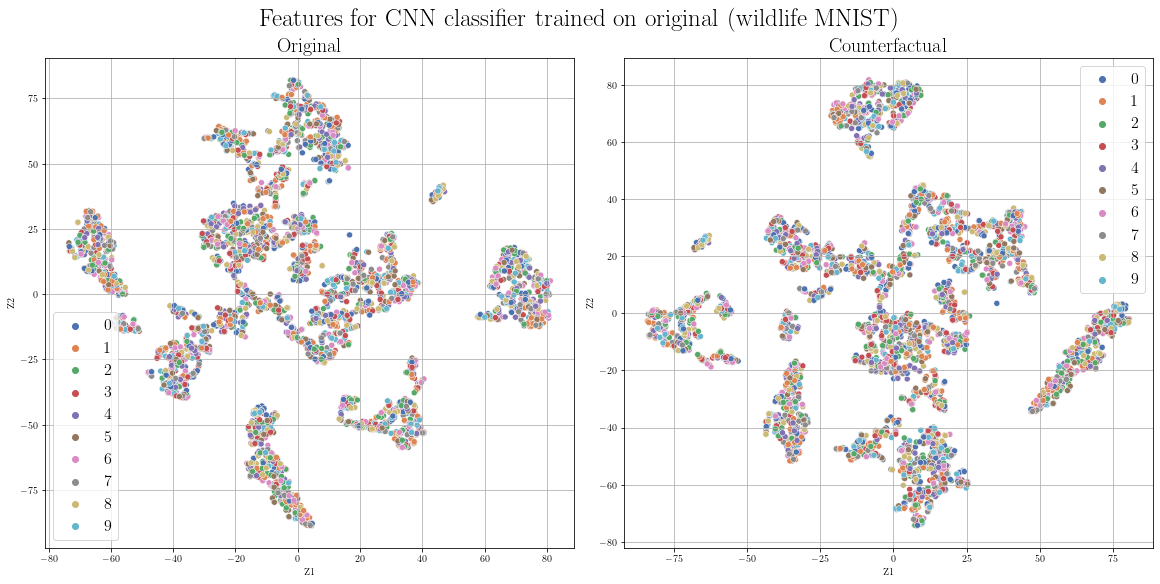

Loading saved gradcam results from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_wildlife_MNIST_seed_0/gradcam/wildlife_MNIST_gradcam_iou_seed_0.pth
Class-wise IOU:
{
    "0": 0.3959088826365957,
    "1": 0.3990622109740524,
    "2": 0.39874927085457423,
    "3": 0.3939673303255757,
    "4": 0.3967507237062571,
    "5": 0.40292002605935917,
    "6": 0.3939355954666542,
    "7": 0.3990669172701486,
    "8": 0.39965610694956144,
    "9": 0.39499887651943144,
    "overall_mean": 0.39749394016861916,
    "overall_std": 0.07422912356778659
}
:::::> Running analysis on wildlife_MNIST with classifier trained on CF dataset
Loading saved features from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_wildlife_MNIST_counterfactual_seed_0/features/wildlife_MNIST_original.pth and /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_wildlife_MNIST_counterfactual_seed_0/features/wildlife_MNIS

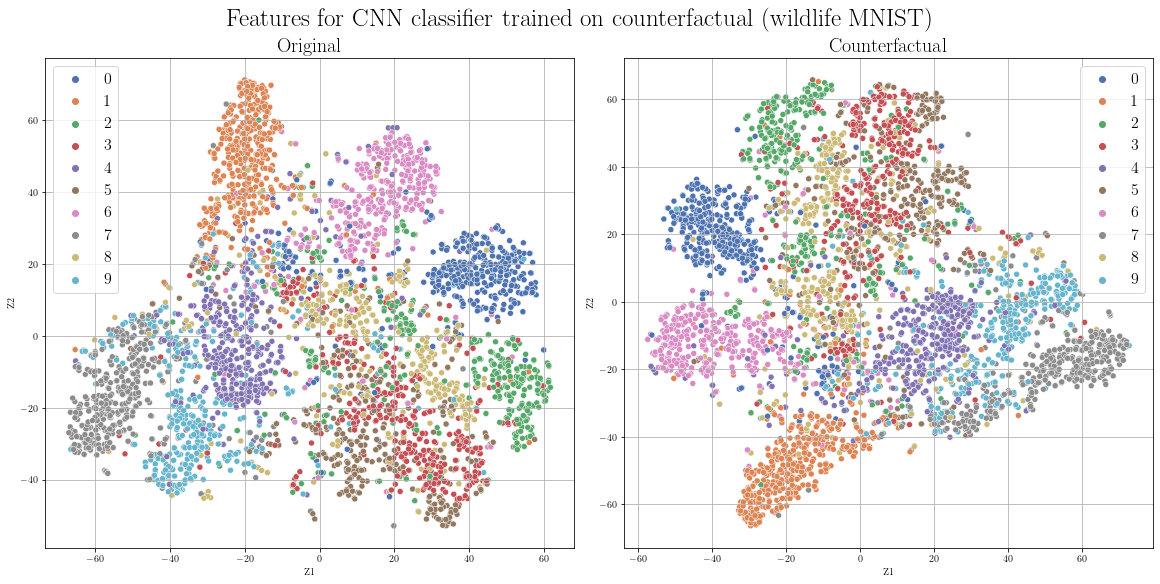

Loading saved gradcam results from /home/lcur0478/piyush/projects/fact-team3/cgn_framework/mnists/experiments/classifier_wildlife_MNIST_counterfactual_seed_0/gradcam/wildlife_MNIST_gradcam_iou_seed_0.pth
Class-wise IOU:
{
    "0": 0.4372059055401988,
    "1": 0.418513055946818,
    "2": 0.4382356478409334,
    "3": 0.4413900952316025,
    "4": 0.4728902568045856,
    "5": 0.4605401488601184,
    "6": 0.44265936988462706,
    "7": 0.46936436194345493,
    "8": 0.43633586280527864,
    "9": 0.4431491911907474,
    "overall_mean": 0.4459087415516376,
    "overall_std": 0.04703421486827076
}
Showing qualitative results for wildlife_MNIST


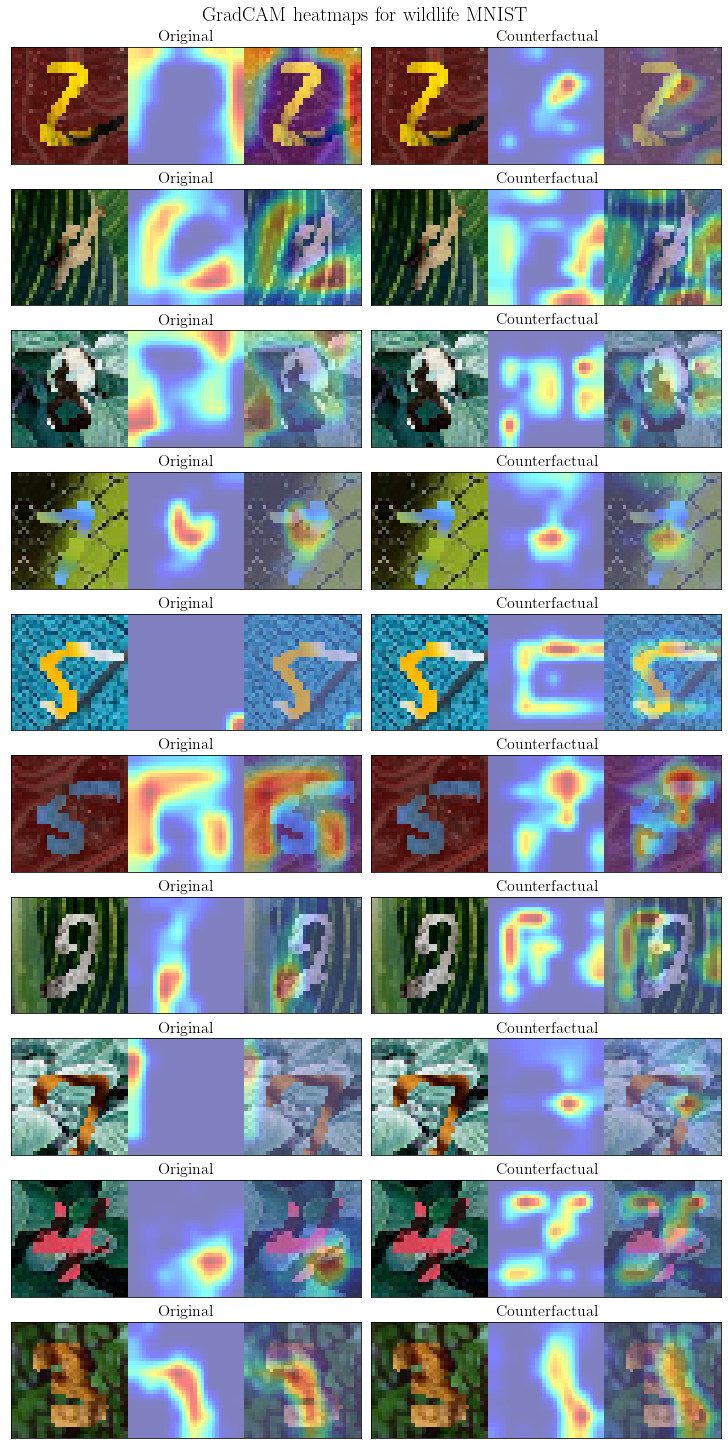

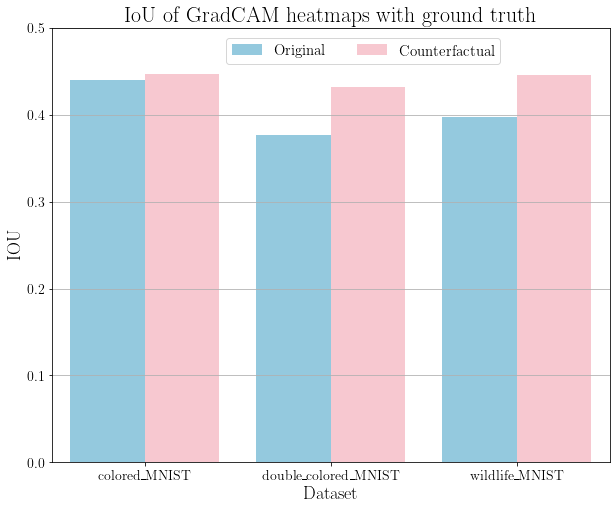

In [17]:
run_analyses(
    datasets=["colored_MNIST", "double_colored_MNIST", "wildlife_MNIST"],
    debug=False,
    show=True,
    ignore_cache=False,
)